In [1]:
# Dependcies
import pandas as pd
import glob
import datetime
import time

import matplotlib.pyplot as plt
import numpy as np


In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



# Load Trading Data and Clean It

In [3]:
headers_df = pd.read_csv('headers/headers.csv')

In [4]:
colnames = list(headers_df)

In [5]:
colnames

['date',
 'tTime',
 'sequenceNbr',
 'sessionInd',
 'symbol',
 'CPF',
 'contractDelivery',
 'volume',
 'strikePrice',
 'tPrice',
 'AB',
 'IND',
 'MKQ',
 'CO',
 'VOE',
 'PC',
 'CAN',
 'INS',
 'FL',
 'CAB',
 'BKI',
 'entryDate',
 'exchCode']

In [6]:
# Read all market data files and create one large pandas dataframe
# path =r'C:\DRO\DCL_rawdata_files' # use your path
allFiles = glob.glob("*.csv")
frame = pd.DataFrame()
bigData = pd.DataFrame()
for file_ in allFiles:
    print(file_)
    df = pd.read_csv(file_,names=colnames, header=None)
    bigData = bigData.append(df)


20180501-TICK_xnym_ng_fut_0-eth.csv
20180502-TICK_xnym_ng_fut_0-eth.csv
20180503-TICK_xnym_ng_fut_0-eth.csv
20180504-TICK_xnym_ng_fut_0-eth.csv
20180507-TICK_xnym_ng_fut_0-eth.csv
20180508-TICK_xnym_ng_fut_0-eth.csv
20180509-TICK_xnym_ng_fut_0-eth.csv
20180510-TICK_xnym_ng_fut_0-eth.csv
20180511-TICK_xnym_ng_fut_0-eth.csv
20180514-TICK_xnym_ng_fut_0-eth.csv
20180515-TICK_xnym_ng_fut_0-eth.csv
20180516-TICK_xnym_ng_fut_0-eth.csv
20180517-TICK_xnym_ng_fut_0-eth.csv
20180518-TICK_xnym_ng_fut_0-eth.csv
20180521-TICK_xnym_ng_fut_0-eth.csv
20180522-TICK_xnym_ng_fut_0-eth.csv
20180523-TICK_xnym_ng_fut_0-eth.csv
20180524-TICK_xnym_ng_fut_0-eth.csv
20180525-TICK_xnym_ng_fut_0-eth.csv
20180528-TICK_xnym_ng_fut_0-eth.csv
20180529-TICK_xnym_ng_fut_0-eth.csv


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


20180530-TICK_xnym_ng_fut_0-eth.csv
20180531-TICK_xnym_ng_fut_0-eth.csv
20180601-TICK_xnym_ng_fut_0-eth.csv
20180604-TICK_xnym_ng_fut_0-eth.csv
20180605-TICK_xnym_ng_fut_0-eth.csv
20180606-TICK_xnym_ng_fut_0-eth.csv
20180607-TICK_xnym_ng_fut_0-eth.csv
20180608-TICK_xnym_ng_fut_0-eth.csv
20180611-TICK_xnym_ng_fut_0-eth.csv
20180612-TICK_xnym_ng_fut_0-eth.csv
20180613-TICK_xnym_ng_fut_0-eth.csv
20180614-TICK_xnym_ng_fut_0-eth.csv
20180615-TICK_xnym_ng_fut_0-eth.csv
20180618-TICK_xnym_ng_fut_0-eth.csv
20180619-TICK_xnym_ng_fut_0-eth.csv
20180620-TICK_xnym_ng_fut_0-eth.csv
20180621-TICK_xnym_ng_fut_0-eth.csv
20180622-TICK_xnym_ng_fut_0-eth.csv
20180625-TICK_xnym_ng_fut_0-eth.csv
20180626-TICK_xnym_ng_fut_0-eth.csv
20180627-TICK_xnym_ng_fut_0-eth.csv
20180628-TICK_xnym_ng_fut_0-eth.csv
20180629-TICK_xnym_ng_fut_0-eth.csv


In [7]:
bigData.shape

(1891977, 23)

In [8]:
bigData.columns

Index(['date', 'tTime', 'sequenceNbr', 'sessionInd', 'symbol', 'CPF', 'contractDelivery', 'volume', 'strikePrice', 'tPrice', 'AB', 'IND', 'MKQ', 'CO', 'VOE', 'PC', 'CAN', 'INS', 'FL', 'CAB', 'BKI', 'entryDate', 'exchCode'], dtype='object')

In [9]:
bigData.head()

date     tTime  sequenceNbr sessionInd symbol CPF  contractDelivery  volume  strikePrice  tPrice  AB  IND  MKQ   CO  VOE  PC  CAN  INS  FL  CAB  BKI  entryDate exchCode
0  20180501  17:00:00       716573          E     NG   F              1806      49          0.0   2.764 NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN   20180430     XNYM
1  20180501  17:00:00       716580          E     NG   F              1806       0          0.0   2.764 NaN  NaN  NaN    O  NaN NaN  NaN  NaN NaN  NaN  NaN   20180430     XNYM
2  20180501  17:00:00       716614          E     NG   F              1806       4          0.0   2.764 NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN   20180430     XNYM
3  20180501  17:00:01       716625          E     NG   F              1806       1          0.0   2.765 NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN   20180430     XNYM
4  20180501  17:00:01       716656          E     NG   F              1806       1          0.0   2.765 NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN   20180430     XNYM

In [10]:
# Code for creating the day of week for the trade
bigData['stringDate'] = bigData['date'].astype(str)
bigData['dow'] = pd.to_datetime(bigData['stringDate'],format='%Y%m%d').dt.weekday
bigData['month'] = pd.to_datetime(bigData['stringDate'],format='%Y%m%d').dt.month

In [11]:
bigData.head()

date     tTime  sequenceNbr sessionInd symbol CPF  contractDelivery  volume  strikePrice  tPrice  AB  IND  MKQ   CO  VOE  PC  CAN  INS  FL  CAB  BKI  entryDate exchCode stringDate  dow  month
0  20180501  17:00:00       716573          E     NG   F              1806      49          0.0   2.764 NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN   20180430     XNYM   20180501    1      5
1  20180501  17:00:00       716580          E     NG   F              1806       0          0.0   2.764 NaN  NaN  NaN    O  NaN NaN  NaN  NaN NaN  NaN  NaN   20180430     XNYM   20180501    1      5
2  20180501  17:00:00       716614          E     NG   F              1806       4          0.0   2.764 NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN   20180430     XNYM   20180501    1      5
3  20180501  17:00:01       716625          E     NG   F              1806       1          0.0   2.765 NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN   20180430     XNYM   20180501    1      5
4  20180501  17:00:01       716656          E     NG   F              1806       1          0.0   2.765 NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN   20180430     XNYM   20180501    1      5

In [12]:
# Create Kloug timefields

bigData['kTimeYear'] = pd.to_datetime(bigData['date'], format = '%Y%m%d')
bigData['kTimeTime'] = pd.to_datetime(bigData['tTime'], format= '%H:%M:%S').dt.time
bigData['kTime'] = bigData['kTimeYear'].astype(str) + "/" + bigData['kTimeTime'].astype(str)
bigData['kTime'] = pd.to_datetime(bigData['kTime'], format = '%Y-%m-%d/%H:%M:%S')


import datetime as dt
bigData_df = bigData.sort_values('kTime')
bigData_df['kTime'] = (bigData_df['kTime'] + dt.timedelta(hours=5))
bigData_df = bigData_df.sort_values('kTime')
bigData_df.head()

date     tTime  sequenceNbr sessionInd symbol CPF  contractDelivery  volume  strikePrice  tPrice  AB  IND  MKQ   CO  VOE  PC  CAN  INS  FL  CAB  BKI  entryDate exchCode stringDate  dow  month  kTimeYear kTimeTime               kTime
30511  20180501  00:00:00       571225          E     NG   F              1807       1          0.0   2.812 NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN   20180501     XNYM   20180501    1      5 2018-05-01  00:00:00 2018-05-01 05:00:00
42322  20180501  00:00:00       559974          E     NG   F              1811       1          0.0   2.856 NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN   20180501     XNYM   20180501    1      5 2018-05-01  00:00:00 2018-05-01 05:00:00
39321  20180501  00:00:00       575765          E     NG   F              1809       1          0.0   2.802 NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN   20180501     XNYM   20180501    1      5 2018-05-01  00:00:00 2018-05-01 05:00:00
875    20180501  00:00:00       730018          E     NG   F              1806       1          0.0   2.777 NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN   20180501     XNYM   20180501    1      5 2018-05-01  00:00:00 2018-05-01 05:00:00
874    20180501  00:00:00       730014          E     NG   F              1806       1          0.0   2.778 NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN   20180501     XNYM   20180501    1      5 2018-05-01  00:00:00 2018-05-01 05:00:00

In [13]:
bigData_df.shape

(1891977, 29)

In [14]:
bigData_df = bigData_df.drop(["AB",'IND','MKQ','VOE','PC','CAN','INS','FL','CAB','BKI'], axis=1)
bigData_df = bigData_df[(bigData_df.CO != "O") & (bigData_df.volume != 0)]
bigData_df.count()

date                1890711
tTime               1890711
sequenceNbr         1890711
sessionInd          1890711
symbol              1890711
CPF                 1890711
contractDelivery    1890711
volume              1890711
strikePrice         1890711
tPrice              1890711
CO                        0
entryDate           1890711
exchCode            1890711
stringDate          1890711
dow                 1890711
month               1890711
kTimeYear           1890711
kTimeTime           1890711
kTime               1890711
dtype: int64

In [15]:
bigData_df = bigData_df.drop(['CO'], axis=1)

In [16]:
bigData_df.count()

date                1890711
tTime               1890711
sequenceNbr         1890711
sessionInd          1890711
symbol              1890711
CPF                 1890711
contractDelivery    1890711
volume              1890711
strikePrice         1890711
tPrice              1890711
entryDate           1890711
exchCode            1890711
stringDate          1890711
dow                 1890711
month               1890711
kTimeYear           1890711
kTimeTime           1890711
kTime               1890711
dtype: int64

In [17]:
bigData_df = bigData_df.drop(["sequenceNbr",'CPF','exchCode','symbol','strikePrice','sessionInd','kTimeYear', 'kTimeTime'], axis=1)

In [18]:
bigData_df = bigData_df.drop(["stringDate"], axis=1)

In [19]:
bigData_df.count()

date                1890711
tTime               1890711
contractDelivery    1890711
volume              1890711
tPrice              1890711
entryDate           1890711
dow                 1890711
month               1890711
kTime               1890711
dtype: int64

In [20]:
bigData_df.dtypes

date                         int64
tTime                       object
contractDelivery             int64
volume                       int64
tPrice                     float64
entryDate                    int64
dow                          int64
month                        int64
kTime               datetime64[ns]
dtype: object

In [23]:
bigData_df

date     tTime  contractDelivery  volume  tPrice  entryDate  dow  month               kTime
30511  20180501  00:00:00              1807       1   2.812   20180501    1      5 2018-05-01 05:00:00
42322  20180501  00:00:00              1811       1   2.856   20180501    1      5 2018-05-01 05:00:00
39321  20180501  00:00:00              1809       1   2.802   20180501    1      5 2018-05-01 05:00:00
875    20180501  00:00:00              1806       1   2.777   20180501    1      5 2018-05-01 05:00:00
874    20180501  00:00:00              1806       1   2.778   20180501    1      5 2018-05-01 05:00:00
873    20180501  00:00:00              1806       1   2.777   20180501    1      5 2018-05-01 05:00:00
37771  20180501  00:00:00              1808       1   2.819   20180501    1      5 2018-05-01 05:00:00
871    20180501  00:00:00              1806       1   2.778   20180501    1      5 2018-05-01 05:00:00
870    20180501  00:00:00              1806      37   2.777   20180501    1      5 2018-05-01 05:00:00
869    20180501  00:00:00              1806       3   2.776   20180501    1      5 2018-05-01 05:00:00
868    20180501  00:00:00              1806       1   2.776   20180501    1      5 2018-05-01 05:00:00
867    20180501  00:00:00              1806       2   2.776   20180501    1      5 2018-05-01 05:00:00
872    20180501  00:00:00              1806       2   2.777   20180501    1      5 2018-05-01 05:00:00
877    20180501  00:00:01              1806       1   2.777   20180501    1      5 2018-05-01 05:00:01
876    20180501  00:00:01              1806       1   2.777   20180501    1      5 2018-05-01 05:00:01
878    20180501  00:00:04              1806       1   2.777   20180501    1      5 2018-05-01 05:00:04
879    20180501  00:00:08              1806       2   2.778   20180501    1      5 2018-05-01 05:00:08
880    20180501  00:00:29              1806       1   2.777   20180501    1      5 2018-05-01 05:00:29
881    20180501  00:00:42              1806       3   2.777   20180501    1      5 2018-05-01 05:00:42
882    20180501  00:01:58              1806       1   2.777   20180501    1      5 2018-05-01 05:01:58
883    20180501  00:03:17              1806       1   2.778   20180501    1      5 2018-05-01 05:03:17
885    20180501  00:06:39              1806       1   2.777   20180501    1      5 2018-05-01 05:06:39
884    20180501  00:06:39              1806       1   2.778   20180501    1      5 2018-05-01 05:06:39
886    20180501  00:07:04              1806       5   2.778   20180501    1      5 2018-05-01 05:07:04
887    20180501  00:07:47              1806       1   2.777   20180501    1      5 2018-05-01 05:07:47
888    20180501  00:09:04              1806       1   2.777   20180501    1      5 2018-05-01 05:09:04
39322  20180501  00:10:33              1809       1   2.802   20180501    1      5 2018-05-01 05:10:33
889    20180501  00:11:19              1806       1   2.777   20180501    1      5 2018-05-01 05:11:19
890    20180501  00:12:10              1806      10   2.777   20180501    1      5 2018-05-01 05:12:10
891    20180501  00:12:11              1806       4   2.777   20180501    1      5 2018-05-01 05:12:11
892    20180501  00:13:34              1806       1   2.778   20180501    1      5 2018-05-01 05:13:34
30512  20180501  00:13:42              1807       1   2.813   20180501    1      5 2018-05-01 05:13:42
30513  20180501  00:13:42              1807       1   2.813   20180501    1      5 2018-05-01 05:13:42
893    20180501  00:14:03              1806       1   2.778   20180501    1      5 2018-05-01 05:14:03
43367  20180501  00:14:21              1812       1   2.966   20180501    1      5 2018-05-01 05:14:21
37772  20180501  00:14:21              1808       1   2.819   20180501    1      5 2018-05-01 05:14:21
37773  20180501  00:14:34              1808       1   2.819   20180501    1      5 2018-05-01 05:14:34
43368  20180501  00:14:34              1812       1   2.966   20180501    1      5 2018-05-01 05:

In [24]:
bigData_hot = pd.get_dummies(data=bigData_df, columns=['dow', 'month'])
bigData_hot.head()

date     tTime  contractDelivery  volume  tPrice  entryDate               kTime  dow_0  dow_1  dow_2  dow_3  dow_4  month_5  month_6
30511  20180501  00:00:00              1807       1   2.812   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0
42322  20180501  00:00:00              1811       1   2.856   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0
39321  20180501  00:00:00              1809       1   2.802   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0
875    20180501  00:00:00              1806       1   2.777   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0
874    20180501  00:00:00              1806       1   2.778   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0

In [27]:
bigData_hot.dtypes

date                         int64
tTime                       object
contractDelivery             int64
volume                       int64
tPrice                     float64
entryDate                    int64
kTime               datetime64[ns]
dow_0                        uint8
dow_1                        uint8
dow_2                        uint8
dow_3                        uint8
dow_4                        uint8
month_5                      uint8
month_6                      uint8
dtype: object

In [28]:
bigData_hot['stringDate'] = bigData_hot['date'].astype(str)
bigData_hot['newDate'] = pd.to_datetime(bigData_hot['stringDate'],format='%Y-%m-%d')

In [29]:
bigData_hot

date     tTime  contractDelivery  volume  tPrice  entryDate               kTime  dow_0  dow_1  dow_2  dow_3  dow_4  month_5  month_6 stringDate    newDate
30511  20180501  00:00:00              1807       1   2.812   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0   20180501 2018-05-01
42322  20180501  00:00:00              1811       1   2.856   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0   20180501 2018-05-01
39321  20180501  00:00:00              1809       1   2.802   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0   20180501 2018-05-01
875    20180501  00:00:00              1806       1   2.777   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0   20180501 2018-05-01
874    20180501  00:00:00              1806       1   2.778   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0   20180501 2018-05-01
873    20180501  00:00:00              1806       1   2.777   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0   20180501 2018-05-01
37771  20180501  00:00:00              1808       1   2.819   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0   20180501 2018-05-01
871    20180501  00:00:00              1806       1   2.778   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0   20180501 2018-05-01
870    20180501  00:00:00              1806      37   2.777   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0   20180501 2018-05-01
869    20180501  00:00:00              1806       3   2.776   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0   20180501 2018-05-01
868    20180501  00:00:00              1806       1   2.776   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0   20180501 2018-05-01
867    20180501  00:00:00              1806       2   2.776   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0   20180501 2018-05-01
872    20180501  00:00:00              1806       2   2.777   20180501 2018-05-01 05:00:00      0      1      0      0      0        1        0   20180501 2018-05-01
877    20180501  00:00:01              1806       1   2.777   20180501 2018-05-01 05:00:01      0      1      0      0      0        1        0   20180501 2018-05-01
876    20180501  00:00:01              1806       1   2.777   20180501 2018-05-01 05:00:01      0      1      0      0      0        1        0   20180501 2018-05-01
878    20180501  00:00:04              1806       1   2.777   20180501 2018-05-01 05:00:04      0      1      0      0      0        1        0   20180501 2018-05-01
879    20180501  00:00:08              1806       2   2.778   20180501 2018-05-01 05:00:08      0      1      0      0      0        1        0   20180501 2018-05-01
880    20180501  00:00:29              1806       1   2.777   20180501 2018-05-01 05:00:29      0      1      0      0      0        1        0   20180501 2018-05-01
881    20180501  00:00:42              1806       3   2.777   20180501 2018-05-01 05:00:42      0      1      0      0      0        1        0   20180501 2018-05-01
882    20180501  00:01:58              1806       1   2.777   20180501 2018-05-01 05:01:58      0      1      0      0      0        1        0   20180501 2018-05-01
883    20180501  00:03:17              1806       1   2.778   20180501 2018-05-01 05:03:17      0      1      0      0      0        1        0   20180501 2018-05-01
885    20180501  00:06:39              1806       1   2.777   20180501 2018-05-01 05:06:39      0      1      0      0      0        1        0   20180501 2018-05-01
884    20180501  00:06:39              1806       1   2.778   20180501 2018-05-01 05:06:39      0      1      0      0      0        1        0   20180501 2018-05-01
886    20180501  00:07:04  

# Add Production Data

In [31]:
grouped_production = pd.read_csv('OtherData/groupedtest.csv')

In [32]:
grouped_production

off_gas_day  operational Capacity  Schedule Capacity  Available Capacity  Design Capacity
0   2018-04-01             312772991          232787788            80378468        316806914
1   2018-04-02             313104624          233022798            80599084        317048813
2   2018-04-03             312993242          234992396            78686861        316957996
3   2018-04-04             313070883          233205339            80614748        317048539
4   2018-04-05             312952026          232718535            80984312        316957760
5   2018-04-06             313408841          233627875            81162719        317058411
6   2018-04-07             313306026          233532855            81086370        316967622
7   2018-04-08             313306594          233464080            81124198        316967695
8   2018-04-09             313225779          233775008            80982230        317069220
9   2018-04-10             313223818          234141830            80367098        317094118
10  2018-04-11             313233209          234039994            80680260        317094232
11  2018-04-12             313230985          233535067            80707870        317090171
12  2018-04-13             312851042          234193625            79777836        316274125
13  2018-04-14             312402090          234352259            79438881        316183271
14  2018-04-15             312401597          233911680            79712718        316183305
15  2018-04-16             312824696          234751467            79577984        316183232
16  2018-04-17             313050936          235030472            79626235        316385541
17  2018-04-18             313027899          235245592            79269465        316385280
18  2018-04-19             313018291          234377676            80108407        316294313
19  2018-04-20             313166128          234544535            79697020        316385042
20  2018-04-21             312382054          233326362            80366081        315603055
21  2018-04-22             312388789          232607131            80573941        315602866
22  2018-04-23             312478817          233599591            80259958        315693521
23  2018-04-24             312402900          235001184            78817889        315602746
24  2018-04-25             311715358          233939669            79228258        315237011
25  2018-04-26             312149381          234002938            79633504        315149956
26  2018-04-27             312164417          233601392            80028740        315150238
27  2018-04-28             312250347          233272192            80329851        315241345
28  2018-04-29             312170343          233053483            80498052        315150790
29  2018-04-30             312028413          233253897            80139384        315151116
30  2018-05-01             313185841          235390179            79640560        316605493
31  2018-05-02             313023712          235143842            79691887        316460571
32  2018-05-03             313054679          235175038            79690305        316369719
33  2018-05-04             313188525          235613346            79348637        316369606
34  2018-05-05             313279560          235575940            79437132        316460406
35  2018-05-06             313294502          235548700            79489727        316460417
36  2018-05-07             313301158          235526532            79617241        316460365
37  2018-05-08             313160169          236211592            78699817        316369580
38  2018-05-09             313168205          236187322            78736745        316369278
39  2018-05-10             313220371          235490501            79638172        316440753
40  2018-05-11             313486315          235581396            79739578        316415029
41  2018-05-12             313745210          235233115            80150665        316505902
42  

In [33]:
grouped_production.dtypes

off_gas_day             object
operational Capacity     int64
Schedule Capacity        int64
Available Capacity       int64
Design Capacity          int64
dtype: object

In [34]:
grouped_production['stringDate'] = grouped_production['off_gas_day'].astype(str)
grouped_production['newDate'] = pd.to_datetime(grouped_production['stringDate'],format='%Y-%m-%d')
grouped_production

off_gas_day  operational Capacity  Schedule Capacity  Available Capacity  Design Capacity  stringDate    newDate
0   2018-04-01             312772991          232787788            80378468        316806914  2018-04-01 2018-04-01
1   2018-04-02             313104624          233022798            80599084        317048813  2018-04-02 2018-04-02
2   2018-04-03             312993242          234992396            78686861        316957996  2018-04-03 2018-04-03
3   2018-04-04             313070883          233205339            80614748        317048539  2018-04-04 2018-04-04
4   2018-04-05             312952026          232718535            80984312        316957760  2018-04-05 2018-04-05
5   2018-04-06             313408841          233627875            81162719        317058411  2018-04-06 2018-04-06
6   2018-04-07             313306026          233532855            81086370        316967622  2018-04-07 2018-04-07
7   2018-04-08             313306594          233464080            81124198        316967695  2018-04-08 2018-04-08
8   2018-04-09             313225779          233775008            80982230        317069220  2018-04-09 2018-04-09
9   2018-04-10             313223818          234141830            80367098        317094118  2018-04-10 2018-04-10
10  2018-04-11             313233209          234039994            80680260        317094232  2018-04-11 2018-04-11
11  2018-04-12             313230985          233535067            80707870        317090171  2018-04-12 2018-04-12
12  2018-04-13             312851042          234193625            79777836        316274125  2018-04-13 2018-04-13
13  2018-04-14             312402090          234352259            79438881        316183271  2018-04-14 2018-04-14
14  2018-04-15             312401597          233911680            79712718        316183305  2018-04-15 2018-04-15
15  2018-04-16             312824696          234751467            79577984        316183232  2018-04-16 2018-04-16
16  2018-04-17             313050936          235030472            79626235        316385541  2018-04-17 2018-04-17
17  2018-04-18             313027899          235245592            79269465        316385280  2018-04-18 2018-04-18
18  2018-04-19             313018291          234377676            80108407        316294313  2018-04-19 2018-04-19
19  2018-04-20             313166128          234544535            79697020        316385042  2018-04-20 2018-04-20
20  2018-04-21             312382054          233326362            80366081        315603055  2018-04-21 2018-04-21
21  2018-04-22             312388789          232607131            80573941        315602866  2018-04-22 2018-04-22
22  2018-04-23             312478817          233599591            80259958        315693521  2018-04-23 2018-04-23
23  2018-04-24             312402900          235001184            78817889        315602746  2018-04-24 2018-04-24
24  2018-04-25             311715358          233939669            79228258        315237011  2018-04-25 2018-04-25
25  2018-04-26             312149381          234002938            79633504        315149956  2018-04-26 2018-04-26
26  2018-04-27             312164417          233601392            80028740        315150238  2018-04-27 2018-04-27
27  2018-04-28             312250347          233272192            80329851        315241345  2018-04-28 2018-04-28
28  2018-04-29             312170343          233053483            80498052        315150790  2018-04-29 2018-04-29
29  2018-04-30             312028413          233253897            80139384        315151116  2018-04-30 2018-04-30
30  2018-05-01             313185841          235390179            79640560        316605493  2018-05-01 2018-05-01
31  2018-05-02             313023712          235143842            79691887        316460571  2018-05-02 2018-05-02
32  2018-05-03             313054679          235175038            79690305        316369719  2018-05-03 2018-05-03
33  2018-05-04             313188525          235613346    

In [35]:
result = pd.merge(bigData_hot, grouped_production, how='outer', left_on=['newDate'], right_on=['newDate'])
result

date     tTime  contractDelivery  volume  tPrice   entryDate               kTime  dow_0  dow_1  dow_2  dow_3  dow_4  month_5  month_6 stringDate_x    newDate off_gas_day  operational Capacity  Schedule Capacity  Available Capacity  Design Capacity stringDate_y
0        20180501.0  00:00:00            1807.0     1.0   2.812  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01
1        20180501.0  00:00:00            1811.0     1.0   2.856  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01
2        20180501.0  00:00:00            1809.0     1.0   2.802  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01
3        20180501.0  00:00:00            1806.0     1.0   2.777  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01
4        20180501.0  00:00:00            1806.0     1.0   2.778  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01
5        20180501.0  00:00:00            1806.0     1.0   2.777  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01
6        20180501.0  00:00:00            1808.0     1.0   2.819  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01
7        20180501.0  00:00:00            1806.0     1.0   2.778  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01
8        20180501.0  00:00:00            1806.0    37.0   2.777  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01
9        20180501.0  00:00:00            1806.0     3.0   2.776  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01
10       20180501.0  00:00:00            1806.0     1.0   2.776  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01
11       20180501.0  00:00:00            1806.0     2.0   2.776  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01
12       20180501.0  00:00:00            1806.0     2.0   2.777  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01
13       20180501.0  00:00:01            1806.0     1.0   2.777  20180501.0 2018-05-01 05:00:01    0.0    1.0    0.0    0.0    0.0      1.0      0.0   

# Add Weather Data

In [36]:
master_weather_df = pd.read_csv('OtherData/masterweather.csv')
master_weather_df.head()

Date    GWHDD1    GWHDD2    GWHDD3    GWHDD4    GWHDD5    GWHDD6    GWHDD7    GWHDD8    GWHDD9  GWHDD10  GWHDD11  GWHDD12  GWHDD13  GWHDD14  GWHDD15    PWCDD1    PWCDD2    PWCDD3    PWCDD4    PWCDD5    PWCDD6    PWCDD7    PWCDD8    PWCDD9  PWCDD10  PWCDD11  PWCDD12  PWCDD13  PWCDD14  PWCDD15
0  5/21/2018  0.048417  0.038833  0.116333  0.157000  0.240000  0.197667  0.354083  0.119583 -0.254583  -0.2080  -0.4510  -0.3514   0.0394   0.2029  0.19975  0.013917 -0.127833 -0.200333 -0.156333 -0.020750 -0.306000 -0.118417  0.447500  1.116250   0.8895   1.0879   1.1641   0.7843   0.2689 -1.40450
1  5/22/2018  0.023583 -0.020167 -0.038667  0.014417 -0.050333 -0.210083 -0.265333  0.106250  0.075917  -0.0762   0.0411   0.1227   0.0106  -0.0400 -0.30775 -0.024583  0.026833  0.031500  0.026500  0.414833  0.606333  0.696750  0.156333 -0.296167   0.2694   0.4077   0.0566  -0.2317  -0.2895  0.24425
2  5/23/2018 -0.016417  0.087750  0.044750  0.012333 -0.005833  0.021000 -0.035583 -0.179500 -0.041250   0.0831   0.2588   0.0888   0.0180  -0.0096 -0.56375  0.110667  0.113583  0.015333 -0.078000  0.139083  0.198833  0.255500  0.431000  0.512917   0.0300  -0.5266  -0.3839  -0.0356   0.0728  1.05325
3  5/24/2018 -0.019750 -0.002167  0.021833 -0.114250  0.045000  0.035500  0.105750  0.074417 -0.227083  -0.0827  -0.0364   0.0326   0.0116  -0.0129 -0.32200  0.144917  0.034583  0.087083  0.205083  0.456250  0.314750  0.017333  0.290250  0.286250   0.5087   0.3760   0.3183   0.4583   0.0804  0.63450
4  5/25/2018  0.011750  0.004167  0.029750  0.024250  0.047583  0.021750  0.119667  0.217083  0.209333   0.2622   0.2872   0.4464   0.3173   0.0289  0.11375  0.092417 -0.116750 -0.111250  0.090583 -0.085500 -0.266083 -0.338667 -0.312250 -0.187083  -0.0236  -0.1414  -0.7578  -0.8721  -0.6200  0.21775

In [37]:
master_weather_df.dtypes

Date        object
GWHDD1     float64
GWHDD2     float64
GWHDD3     float64
GWHDD4     float64
GWHDD5     float64
GWHDD6     float64
GWHDD7     float64
GWHDD8     float64
GWHDD9     float64
GWHDD10    float64
GWHDD11    float64
GWHDD12    float64
GWHDD13    float64
GWHDD14    float64
GWHDD15    float64
PWCDD1     float64
PWCDD2     float64
PWCDD3     float64
PWCDD4     float64
PWCDD5     float64
PWCDD6     float64
PWCDD7     float64
PWCDD8     float64
PWCDD9     float64
PWCDD10    float64
PWCDD11    float64
PWCDD12    float64
PWCDD13    float64
PWCDD14    float64
PWCDD15    float64
dtype: object

In [38]:
master_weather_df['stringDate'] = master_weather_df['Date'].astype(str)
master_weather_df['newDate'] = pd.to_datetime(master_weather_df['stringDate'],format='%m/%d/%Y')
master_weather_df

Date    GWHDD1    GWHDD2    GWHDD3    GWHDD4    GWHDD5    GWHDD6        GWHDD7    GWHDD8    GWHDD9  GWHDD10  GWHDD11  GWHDD12  GWHDD13  GWHDD14  GWHDD15    PWCDD1    PWCDD2    PWCDD3    PWCDD4    PWCDD5    PWCDD6    PWCDD7    PWCDD8    PWCDD9  PWCDD10  PWCDD11  PWCDD12  PWCDD13  PWCDD14  PWCDD15 stringDate    newDate
0   5/21/2018  0.048417  0.038833  0.116333  0.157000  0.240000  0.197667  3.540833e-01  0.119583 -0.254583  -0.2080  -0.4510  -0.3514   0.0394   0.2029  0.19975  0.013917 -0.127833 -0.200333 -0.156333 -0.020750 -0.306000 -0.118417  0.447500  1.116250   0.8895   1.0879   1.1641   0.7843   0.2689 -1.40450  5/21/2018 2018-05-21
1   5/22/2018  0.023583 -0.020167 -0.038667  0.014417 -0.050333 -0.210083 -2.653333e-01  0.106250  0.075917  -0.0762   0.0411   0.1227   0.0106  -0.0400 -0.30775 -0.024583  0.026833  0.031500  0.026500  0.414833  0.606333  0.696750  0.156333 -0.296167   0.2694   0.4077   0.0566  -0.2317  -0.2895  0.24425  5/22/2018 2018-05-22
2   5/23/2018 -0.016417  0.087750  0.044750  0.012333 -0.005833  0.021000 -3.558333e-02 -0.179500 -0.041250   0.0831   0.2588   0.0888   0.0180  -0.0096 -0.56375  0.110667  0.113583  0.015333 -0.078000  0.139083  0.198833  0.255500  0.431000  0.512917   0.0300  -0.5266  -0.3839  -0.0356   0.0728  1.05325  5/23/2018 2018-05-23
3   5/24/2018 -0.019750 -0.002167  0.021833 -0.114250  0.045000  0.035500  1.057500e-01  0.074417 -0.227083  -0.0827  -0.0364   0.0326   0.0116  -0.0129 -0.32200  0.144917  0.034583  0.087083  0.205083  0.456250  0.314750  0.017333  0.290250  0.286250   0.5087   0.3760   0.3183   0.4583   0.0804  0.63450  5/24/2018 2018-05-24
4   5/25/2018  0.011750  0.004167  0.029750  0.024250  0.047583  0.021750  1.196667e-01  0.217083  0.209333   0.2622   0.2872   0.4464   0.3173   0.0289  0.11375  0.092417 -0.116750 -0.111250  0.090583 -0.085500 -0.266083 -0.338667 -0.312250 -0.187083  -0.0236  -0.1414  -0.7578  -0.8721  -0.6200  0.21775  5/25/2018 2018-05-25
5   5/26/2018  0.024250 -0.023167  0.034917  0.021917  0.054583 -0.030917 -1.797500e-01 -0.124583  0.043500   0.0795  -0.1789  -0.3746  -0.1968   0.0206  0.77075  0.035500  0.037917 -0.069083 -0.185167 -0.201417  0.216083  0.328000 -0.177167 -0.287167  -0.2507  -0.0779   0.6117   1.0067   0.9292 -1.59900  5/26/2018 2018-05-26
6   5/27/2018  0.049000  0.005000  0.020083 -0.043167 -0.099417  0.128000  2.118333e-01  0.097167 -0.071333  -0.2482   0.1486   0.0615   0.0079   0.0073  0.00300  0.002917 -0.000167 -0.020833 -0.101333 -0.154750 -0.225417 -0.513500 -0.214167  0.180417   0.5277   0.2522  -0.0514  -0.2417  -0.1562 -0.53200  5/27/2018 2018-05-27
7   5/28/2018  0.024500  0.021417  0.115833  0.094500 -0.063083  0.030083  1.633333e-02  0.021833 -0.029167  -0.0734  -0.0294   0.0851  -0.0081   0.0275  0.20575 -0.196667 -0.002167  0.030000 -0.014000  0.097000  0.185917 -0.041667 -0.257000 -0.148917  -0.0539  -0.0379  -0.0104  -0.3187  -0.3924 -0.65575  5/28/2018 2018-05-28
8   5/29/2018  0.009833 -0.024333  0.005667 -0.138417  0.053500  0.063167  1.010000e-01  0.117250  0.156417   0.1156   0.1335   0.2055   0.3759   0.3024  0.09050  0.054250  0.112750  0.056417 -0.007500  0.158833  0.074417  0.064333  0.175083 -0.068750  -0.0103  -0.2375  -0.5572  -0.7409  -0.8754 -1.04675  5/29/2018 2018-05-29
9   5/30/2018 -0.019250 -0.015250  0.004667  0.039333  0.459750  0.491583  4.051667e-01  0.121667 -0.175167  -0.3900  -0.3587  -0.2591  -0.4310  -0.2683  0.13375 -0.089250  0.073750  0.251250 -0.298333 -0.515167 -0.576917 -0.590250 -0.154500  0.475083   1.2120   1.0160   0.8023   0.7206   0.8743 -0.78500  5/30/2018 2018-05-30
10  5/31/2018  0.005750  0.056667  0.186167  0.234583 -0.093333 -0.061583 -9.250000e-03  0.027750 -0.031833   0.0065   0.0204   0.0243  -0.0211  -0.0468 -0.04475 -0.137000 -0.274333 -0.151750 -0.197000 -0.145167 -0.102417 -0.252333 -0.208167 -0.311583  -0.5826  -0.0211   0.3411   0.4037   0.5692 -0.46375  5/31/2018 2018-05-31
11   6/1/2018  0.007333 -0.038667 -0.169417 -0.232000 -0.178083 -0.119833

In [39]:
result2 = pd.merge(result, master_weather_df, how='outer', left_on=['newDate'], right_on=['newDate'])
result2

date     tTime  contractDelivery  volume  tPrice   entryDate               kTime  dow_0  dow_1  dow_2  dow_3  dow_4  month_5  month_6 stringDate_x    newDate off_gas_day  operational Capacity  Schedule Capacity  Available Capacity  Design Capacity stringDate_y       Date    GWHDD1    GWHDD2    GWHDD3    GWHDD4    GWHDD5    GWHDD6        GWHDD7    GWHDD8    GWHDD9  GWHDD10  GWHDD11  GWHDD12  GWHDD13  GWHDD14  GWHDD15    PWCDD1    PWCDD2    PWCDD3    PWCDD4    PWCDD5    PWCDD6    PWCDD7    PWCDD8    PWCDD9  PWCDD10  PWCDD11  PWCDD12  PWCDD13  PWCDD14  PWCDD15 stringDate
0        20180501.0  00:00:00            1807.0     1.0   2.812  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01        NaN       NaN       NaN       NaN       NaN       NaN       NaN           NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN        NaN
1        20180501.0  00:00:00            1811.0     1.0   2.856  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01        NaN       NaN       NaN       NaN       NaN       NaN       NaN           NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN        NaN
2        20180501.0  00:00:00            1809.0     1.0   2.802  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01        NaN       NaN       NaN       NaN       NaN       NaN       NaN           NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN        NaN
3        20180501.0  00:00:00            1806.0     1.0   2.777  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01        NaN       NaN       NaN       NaN       NaN       NaN       NaN           NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN        NaN
4        20180501.0  00:00:00            1806.0     1.0   2.778  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01        NaN       NaN       NaN       NaN       NaN       NaN       NaN           NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN        NaN
5        20180501.0  00:00:00            1806.0     1.0   2.777  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01             313185841          235390179            79640560        316605493   2018-05-01        NaN       NaN       NaN       NaN       NaN       NaN       NaN           NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN 

# Add Settle Data

In [40]:
settles_df = pd.read_csv('OtherData/NG1Settles.csv')
settles_df.head()

Dates  PX_SETTLE
0  4/2/2018      2.683
1  4/3/2018      2.697
2  4/4/2018      2.718
3  4/5/2018      2.675
4  4/6/2018      2.701

In [41]:
settles_df['stringDate'] = settles_df['Dates'].astype(str)
settles_df['newDate'] = pd.to_datetime(settles_df['stringDate'],format='%m/%d/%Y')
settles_df

Dates  PX_SETTLE stringDate    newDate
0    4/2/2018      2.683   4/2/2018 2018-04-02
1    4/3/2018      2.697   4/3/2018 2018-04-03
2    4/4/2018      2.718   4/4/2018 2018-04-04
3    4/5/2018      2.675   4/5/2018 2018-04-05
4    4/6/2018      2.701   4/6/2018 2018-04-06
5    4/9/2018      2.693   4/9/2018 2018-04-09
6   4/10/2018      2.656  4/10/2018 2018-04-10
7   4/11/2018      2.675  4/11/2018 2018-04-11
8   4/12/2018      2.686  4/12/2018 2018-04-12
9   4/13/2018      2.735  4/13/2018 2018-04-13
10  4/16/2018      2.752  4/16/2018 2018-04-16
11  4/17/2018      2.738  4/17/2018 2018-04-17
12  4/18/2018      2.739  4/18/2018 2018-04-18
13  4/19/2018      2.660  4/19/2018 2018-04-19
14  4/20/2018      2.739  4/20/2018 2018-04-20
15  4/23/2018      2.740  4/23/2018 2018-04-23
16  4/24/2018      2.781  4/24/2018 2018-04-24
17  4/25/2018      2.786  4/25/2018 2018-04-25
18  4/26/2018      2.821  4/26/2018 2018-04-26
19  4/27/2018      2.771  4/27/2018 2018-04-27
20  4/30/2018      2.763  4/30/2018 2018-04-30
21   5/1/2018      2.802   5/1/2018 2018-05-01
22   5/2/2018      2.754   5/2/2018 2018-05-02
23   5/3/2018      2.726   5/3/2018 2018-05-03
24   5/4/2018      2.711   5/4/2018 2018-05-04
25   5/7/2018      2.741   5/7/2018 2018-05-07
26   5/8/2018      2.732   5/8/2018 2018-05-08
27   5/9/2018      2.737   5/9/2018 2018-05-09
28  5/10/2018      2.814  5/10/2018 2018-05-10
29  5/11/2018      2.806  5/11/2018 2018-05-11
30  5/14/2018      2.842  5/14/2018 2018-05-14
31  5/15/2018      2.836  5/15/2018 2018-05-15
32  5/16/2018      2.815  5/16/2018 2018-05-16
33  5/17/2018      2.859  5/17/2018 2018-05-17
34  5/18/2018      2.847  5/18/2018 2018-05-18
35  5/21/2018      2.810  5/21/2018 2018-05-21
36  5/22/2018      2.908  5/22/2018 2018-05-22
37  5/23/2018      2.914  5/23/2018 2018-05-23
38  5/24/2018      2.940  5/24/2018 2018-05-24
39  5/25/2018      2.939  5/25/2018 2018-05-25
40  5/29/2018      2.875  5/29/2018 2018-05-29
41  5/30/2018      2.885  5/30/2018 2018-05-30
42  5/31/2018      2.952  5/31/2018 2018-05-31
43   6/1/2018      2.962   6/1/2018 2018-06-01
44   6/4/2018      2.930   6/4/2018 2018-06-04
45   6/5/2018      2.890   6/5/2018 2018-06-05
46   6/6/2018      2.896   6/6/2018 2018-06-06
47   6/7/2018      2.930   6/7/2018 2018-06-07
48   6/8/2018      2.890   6/8/2018 2018-06-08
49  6/11/2018      2.949  6/11/2018 2018-06-11
50  6/12/2018      2.939  6/12/2018 2018-06-12
51  6/13/2018      2.963  6/13/2018 2018-06-13
52  6/14/2018      2.965  6/14/2018 2018-06-14
53  6/15/2018      3.022  6/15/2018 2018-06-15
54  6/18/2018      2.951  6/18/2018 2018-06-18
55  6/19/2018      2.900  6/19/2018 2018-06-19
56  6/20/2018      2.964  6/20/2018 2018-06-20
57  6/21/2018      2.975  6/21/2018 2018-06-21
58  6/22/2018      2.945  6/22/2018 2018-06-22
59  6/25/2018      2.923  6/25/2018 2018-06-25
60  6/26/2018      2.939  6/26/2018 2018-06-26
61  6/27/2018      2.996  6/27/2018 2018-06-27
62  6/28/2018      2.940  6/28/2018 2018-06-28
63  6/29/2018      2.924  6/29/2018 2018-06-29
64   7/2/2018      2.862   7/2/2018 2018-07-02
65   7/3/2018      2.870   7/3/2018 2018-07-03
66   7/5/2018      2.837   7/5/2018 2018-07-05
67   7/6/2018      2.858   7/6/2018 2018-07-06
68   7/9/2018      2.828   7/9/2018 2018-07-09

In [42]:
result25 = pd.merge(result2, settles_df, how='outer', left_on=['newDate'], right_on=['newDate'])
result25

date     tTime  contractDelivery  volume  tPrice   entryDate               kTime  dow_0  dow_1  dow_2  dow_3  dow_4  month_5  month_6 stringDate_x    newDate off_gas_day  operational Capacity  Schedule Capacity  Available Capacity  Design Capacity stringDate_y       Date    GWHDD1    GWHDD2    GWHDD3    GWHDD4    GWHDD5    GWHDD6        GWHDD7    GWHDD8    GWHDD9  GWHDD10  GWHDD11  GWHDD12  GWHDD13  GWHDD14  GWHDD15    PWCDD1    PWCDD2    PWCDD3    PWCDD4    PWCDD5    PWCDD6    PWCDD7    PWCDD8    PWCDD9  PWCDD10  PWCDD11  PWCDD12  PWCDD13  PWCDD14  PWCDD15 stringDate_x      Dates  PX_SETTLE stringDate_y
0        20180501.0  00:00:00            1807.0     1.0   2.812  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01           313185841.0        235390179.0          79640560.0      316605493.0   2018-05-01        NaN       NaN       NaN       NaN       NaN       NaN       NaN           NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN          NaN   5/1/2018      2.802     5/1/2018
1        20180501.0  00:00:00            1811.0     1.0   2.856  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01           313185841.0        235390179.0          79640560.0      316605493.0   2018-05-01        NaN       NaN       NaN       NaN       NaN       NaN       NaN           NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN          NaN   5/1/2018      2.802     5/1/2018
2        20180501.0  00:00:00            1809.0     1.0   2.802  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01           313185841.0        235390179.0          79640560.0      316605493.0   2018-05-01        NaN       NaN       NaN       NaN       NaN       NaN       NaN           NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN          NaN   5/1/2018      2.802     5/1/2018
3        20180501.0  00:00:00            1806.0     1.0   2.777  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01           313185841.0        235390179.0          79640560.0      316605493.0   2018-05-01        NaN       NaN       NaN       NaN       NaN       NaN       NaN           NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN          NaN   5/1/2018      2.802     5/1/2018
4        20180501.0  00:00:00            1806.0     1.0   2.778  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01           313185841.0        235390179.0          79640560.0      316605493.0   2018-05-01        NaN       NaN       NaN       NaN       NaN       NaN       NaN           NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN          NaN   5/1/2018      2.802     5/1/2018
5        20180501.0  00:00:00            1806.0     1.0   2.777  20180501.0 2018-05-01 05:00:00    0.0    1.0    0.0    0.0    0.0      1.0      0.0     20180501 2018-05-01  2018-05-01           313185841.0        235390179.0          79640560.0      31

# DROP NAs Created with Merges

In [43]:
result3 = result25.dropna()
result3

date     tTime  contractDelivery  volume  tPrice   entryDate               kTime  dow_0  dow_1  dow_2  dow_3  dow_4  month_5  month_6 stringDate_x    newDate off_gas_day  operational Capacity  Schedule Capacity  Available Capacity  Design Capacity stringDate_y       Date    GWHDD1    GWHDD2    GWHDD3    GWHDD4    GWHDD5    GWHDD6    GWHDD7    GWHDD8    GWHDD9  GWHDD10  GWHDD11  GWHDD12  GWHDD13  GWHDD14  GWHDD15    PWCDD1    PWCDD2    PWCDD3    PWCDD4    PWCDD5    PWCDD6    PWCDD7  PWCDD8    PWCDD9  PWCDD10  PWCDD11  PWCDD12  PWCDD13  PWCDD14  PWCDD15 stringDate_x      Dates  PX_SETTLE stringDate_y
575938   20180521.0  00:00:46            1806.0     1.0   2.831  20180521.0 2018-05-21 05:00:46    1.0    0.0    0.0    0.0    0.0      1.0      0.0     20180521 2018-05-21  2018-05-21           314912889.0        235697117.0          80918118.0      316680147.0   2018-05-21  5/21/2018  0.048417  0.038833  0.116333  0.157000  0.240000  0.197667  0.354083  0.119583 -0.254583  -0.2080  -0.4510  -0.3514   0.0394   0.2029  0.19975  0.013917 -0.127833 -0.200333 -0.156333 -0.020750 -0.306000 -0.118417  0.4475  1.116250   0.8895   1.0879   1.1641   0.7843   0.2689 -1.40450    5/21/2018  5/21/2018      2.810    5/21/2018
575939   20180521.0  00:06:03            1806.0     1.0   2.831  20180521.0 2018-05-21 05:06:03    1.0    0.0    0.0    0.0    0.0      1.0      0.0     20180521 2018-05-21  2018-05-21           314912889.0        235697117.0          80918118.0      316680147.0   2018-05-21  5/21/2018  0.048417  0.038833  0.116333  0.157000  0.240000  0.197667  0.354083  0.119583 -0.254583  -0.2080  -0.4510  -0.3514   0.0394   0.2029  0.19975  0.013917 -0.127833 -0.200333 -0.156333 -0.020750 -0.306000 -0.118417  0.4475  1.116250   0.8895   1.0879   1.1641   0.7843   0.2689 -1.40450    5/21/2018  5/21/2018      2.810    5/21/2018
575940   20180521.0  00:06:29            1807.0     1.0   2.863  20180521.0 2018-05-21 05:06:29    1.0    0.0    0.0    0.0    0.0      1.0      0.0     20180521 2018-05-21  2018-05-21           314912889.0        235697117.0          80918118.0      316680147.0   2018-05-21  5/21/2018  0.048417  0.038833  0.116333  0.157000  0.240000  0.197667  0.354083  0.119583 -0.254583  -0.2080  -0.4510  -0.3514   0.0394   0.2029  0.19975  0.013917 -0.127833 -0.200333 -0.156333 -0.020750 -0.306000 -0.118417  0.4475  1.116250   0.8895   1.0879   1.1641   0.7843   0.2689 -1.40450    5/21/2018  5/21/2018      2.810    5/21/2018
575941   20180521.0  00:08:58            1806.0     1.0   2.830  20180521.0 2018-05-21 05:08:58    1.0    0.0    0.0    0.0    0.0      1.0      0.0     20180521 2018-05-21  2018-05-21           314912889.0        235697117.0          80918118.0      316680147.0   2018-05-21  5/21/2018  0.048417  0.038833  0.116333  0.157000  0.240000  0.197667  0.354083  0.119583 -0.254583  -0.2080  -0.4510  -0.3514   0.0394   0.2029  0.19975  0.013917 -0.127833 -0.200333 -0.156333 -0.020750 -0.306000 -0.118417  0.4475  1.116250   0.8895   1.0879   1.1641   0.7843   0.2689 -1.40450    5/21/2018  5/21/2018      2.810    5/21/2018
575942   20180521.0  00:11:38            1806.0     1.0   2.831  20180521.0 2018-05-21 05:11:38    1.0    0.0    0.0    0.0    0.0      1.0      0.0     20180521 2018-05-21  2018-05-21           314912889.0        235697117.0          80918118.0      316680147.0   2018-05-21  5/21/2018  0.048417  0.038833  0.116333  0.157000  0.240000  0.197667  0.354083  0.119583 -0.254583  -0.2080  -0.4510  -0.3514   0.0394   0.2029  0.19975  0.013917 -0.127833 -0.200333 -0.156333 -0.020750 -0.306000 -0.118417  0.4475  1.116250   0.8895   1.0879   1.1641   0.7843   0.2689 -1.40450    5/21/2018  5/21/2018      2.810    5/21/2018
575943   20180521.0  00:11:58            1806.0     1.0   2.830  20180521.0 2018-05-21 05:11:58    1.0    0.0    0.0    0.0    0.0      1.0      0.0     20180521 2018-05-21  2018-05-21           314912889.0        235697117.0          80918118.0      316680147.0   2018-05-21  5/21/2018  0

In [49]:
#Create Time Columns
result3['skTime'] = result3['kTime'].astype(np.int64)
result3['sec']=pd.to_timedelta(result3.tTime).dt.total_seconds().astype(int)
result3['ageOrder']=result3['date']-result3['entryDate']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [50]:
data_for_analysis = result3
data_for_analysis

date     tTime  contractDelivery  volume  tPrice   entryDate               kTime  dow_0  dow_1  dow_2  dow_3  dow_4  month_5  month_6 stringDate_x    newDate off_gas_day  operational Capacity  Schedule Capacity  Available Capacity  Design Capacity stringDate_y       Date    GWHDD1    GWHDD2    GWHDD3    GWHDD4    GWHDD5    GWHDD6    GWHDD7    GWHDD8    GWHDD9  GWHDD10  GWHDD11  GWHDD12  GWHDD13  GWHDD14  GWHDD15    PWCDD1    PWCDD2    PWCDD3    PWCDD4    PWCDD5    PWCDD6    PWCDD7  PWCDD8    PWCDD9  PWCDD10  PWCDD11  PWCDD12  PWCDD13  PWCDD14  PWCDD15 stringDate_x      Dates  PX_SETTLE stringDate_y               skTime    sec  ageOrder
575938   20180521.0  00:00:46            1806.0     1.0   2.831  20180521.0 2018-05-21 05:00:46    1.0    0.0    0.0    0.0    0.0      1.0      0.0     20180521 2018-05-21  2018-05-21           314912889.0        235697117.0          80918118.0      316680147.0   2018-05-21  5/21/2018  0.048417  0.038833  0.116333  0.157000  0.240000  0.197667  0.354083  0.119583 -0.254583  -0.2080  -0.4510  -0.3514   0.0394   0.2029  0.19975  0.013917 -0.127833 -0.200333 -0.156333 -0.020750 -0.306000 -0.118417  0.4475  1.116250   0.8895   1.0879   1.1641   0.7843   0.2689 -1.40450    5/21/2018  5/21/2018      2.810    5/21/2018  1526878846000000000     46       0.0
575939   20180521.0  00:06:03            1806.0     1.0   2.831  20180521.0 2018-05-21 05:06:03    1.0    0.0    0.0    0.0    0.0      1.0      0.0     20180521 2018-05-21  2018-05-21           314912889.0        235697117.0          80918118.0      316680147.0   2018-05-21  5/21/2018  0.048417  0.038833  0.116333  0.157000  0.240000  0.197667  0.354083  0.119583 -0.254583  -0.2080  -0.4510  -0.3514   0.0394   0.2029  0.19975  0.013917 -0.127833 -0.200333 -0.156333 -0.020750 -0.306000 -0.118417  0.4475  1.116250   0.8895   1.0879   1.1641   0.7843   0.2689 -1.40450    5/21/2018  5/21/2018      2.810    5/21/2018  1526879163000000000    363       0.0
575940   20180521.0  00:06:29            1807.0     1.0   2.863  20180521.0 2018-05-21 05:06:29    1.0    0.0    0.0    0.0    0.0      1.0      0.0     20180521 2018-05-21  2018-05-21           314912889.0        235697117.0          80918118.0      316680147.0   2018-05-21  5/21/2018  0.048417  0.038833  0.116333  0.157000  0.240000  0.197667  0.354083  0.119583 -0.254583  -0.2080  -0.4510  -0.3514   0.0394   0.2029  0.19975  0.013917 -0.127833 -0.200333 -0.156333 -0.020750 -0.306000 -0.118417  0.4475  1.116250   0.8895   1.0879   1.1641   0.7843   0.2689 -1.40450    5/21/2018  5/21/2018      2.810    5/21/2018  1526879189000000000    389       0.0
575941   20180521.0  00:08:58            1806.0     1.0   2.830  20180521.0 2018-05-21 05:08:58    1.0    0.0    0.0    0.0    0.0      1.0      0.0     20180521 2018-05-21  2018-05-21           314912889.0        235697117.0          80918118.0      316680147.0   2018-05-21  5/21/2018  0.048417  0.038833  0.116333  0.157000  0.240000  0.197667  0.354083  0.119583 -0.254583  -0.2080  -0.4510  -0.3514   0.0394   0.2029  0.19975  0.013917 -0.127833 -0.200333 -0.156333 -0.020750 -0.306000 -0.118417  0.4475  1.116250   0.8895   1.0879   1.1641   0.7843   0.2689 -1.40450    5/21/2018  5/21/2018      2.810    5/21/2018  1526879338000000000    538       0.0
575942   20180521.0  00:11:38            1806.0     1.0   2.831  20180521.0 2018-05-21 05:11:38    1.0    0.0    0.0    0.0    0.0      1.0      0.0     20180521 2018-05-21  2018-05-21           314912889.0        235697117.0          80918118.0      316680147.0   2018-05-21  5/21/2018  0.048417  0.038833  0.116333  0.157000  0.240000  0.197667  0.354083  0.119583 -0.254583  -0.2080  -0.4510  -0.3514   0.0394   0.2029  0.19975  0.013917 -0.127833 -0.200333 -0.156333 -0.020750 -0.306000 -0.118417  0.4475  1.116250   0.8895   1.0879   1.1641   0.7843   0.2689 -1.40450    5/21/2018  5/21/2018      2.810    5/21/2018  1526879498000000000    698       0.0
575943   20180521.0  00:11:58            1806.0     1.0   2.8

# #nofilter

In [158]:

# Assign X (data) and y (target)

### BEGIN SOLUTION
#X = filtered_data1[['sec','volume','PX_SETTLE','operational Capacity','Schedule Capacity','Available Capacity','Design Capacity','GWHDD1','PWCDD1','GWHDD2','PWCDD2','GWHDD3','PWCDD3','GWHDD4','PWCDD4','GWHDD5','PWCDD5','GWHDD6','PWCDD6']]
X = data_for_analysis[['contractDelivery', 'volume', 'entryDate', 'ageOrder', 'sec']]

y = data_for_analysis["tPrice"].values.reshape(-1, 1)

target = data_for_analysis["tPrice"]
data = X
feature_names = data.columns

print(X.shape, y.shape)
### END SOLUTION

(1302885, 5) (1302885, 1)


In [159]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [160]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [161]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [162]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

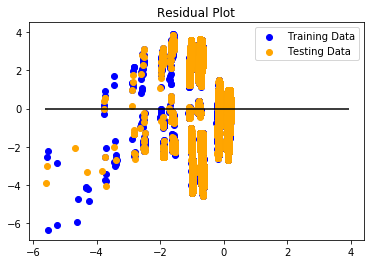

In [163]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [164]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9160469716329361, R2: 0.08312393615421243


In [165]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9162471338076111, R2: 0.0829235928175387


In [166]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9160469716101327, R2: 0.0831239361770365


In [167]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9160992317238349, R2: 0.08307162876395491


In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [169]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.97635034785825159

In [170]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.7968146645431784, 'contractDelivery'),
 (0.13856976201989538, 'entryDate'),
 (0.059996804637765022, 'sec'),
 (0.0043782606496488444, 'volume'),
 (0.00024050814951253539, 'ageOrder')]

In [171]:
#Random forest

from sklearn.ensemble import RandomForestRegressor

estimators = [5,10,25,50]
scores = []
for estimate in estimators:
   rf = RandomForestRegressor(n_estimators=estimate)
   rf = rf.fit(X_train, y_train)
   score = rf.score(X_test, y_test)
   scores.append(score)
   print(f"This is the score for {estimate} trees: {score}")
   depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
   num = len(depths)
   #print(depths)
   print(f"average depth of trees in forrest: {sum(depths)/num}")
   print(f"number of trees used {num}")
   print("==============================================================")

This is the score for 5 trees: 0.9741250042336973
average depth of trees in forrest: 55.4
number of trees used 5
This is the score for 10 trees: 0.975117546386757
average depth of trees in forrest: 57.5
number of trees used 10
This is the score for 25 trees: 0.9759483718408092
average depth of trees in forrest: 57.84
number of trees used 25
This is the score for 50 trees: 0.9761672698423631
average depth of trees in forrest: 56.42
number of trees used 50


# Filter Data for Analysis - Production, Weather, Settle Price

In [64]:
filtered_data1 = data_for_analysis[(data_for_analysis.contractDelivery == 1807.0) & (data_for_analysis.month_6 == 1.0)]
filtered_data1.sort_values(by=['skTime'])
filtered_data1

date     tTime  contractDelivery  volume  tPrice   entryDate               kTime  dow_0  dow_1  dow_2  dow_3  dow_4  month_5  month_6 stringDate_x    newDate off_gas_day  operational Capacity  Schedule Capacity  Available Capacity  Design Capacity stringDate_y       Date    GWHDD1    GWHDD2    GWHDD3    GWHDD4    GWHDD5    GWHDD6    GWHDD7   GWHDD8    GWHDD9  GWHDD10  GWHDD11  GWHDD12  GWHDD13  GWHDD14  GWHDD15    PWCDD1    PWCDD2    PWCDD3    PWCDD4    PWCDD5    PWCDD6   PWCDD7    PWCDD8    PWCDD9  PWCDD10  PWCDD11  PWCDD12  PWCDD13  PWCDD14  PWCDD15 stringDate_x      Dates  PX_SETTLE stringDate_y               skTime    sec  ageOrder
964597   20180601.0  00:00:33            1807.0     5.0   2.949  20180601.0 2018-06-01 05:00:33    0.0    0.0    0.0    0.0    1.0      0.0      1.0     20180601 2018-06-01  2018-06-01           314020530.0        235450600.0          80090009.0      316627591.0   2018-06-01   6/1/2018  0.007333 -0.038667 -0.169417 -0.232000 -0.178083 -0.119833 -0.147250 -0.11450 -0.009333   0.1711   0.1317   0.0552   0.0719   0.1517  0.14625  0.075000  0.039500  0.022333  0.213750  0.181750  0.052667  0.08125  0.161417  0.376333   0.4171   0.3981   0.5985   0.8583   1.1719  -0.6715     6/1/2018   6/1/2018      2.962     6/1/2018  1527829233000000000     33       0.0
964598   20180601.0  00:00:33            1807.0     2.0   2.949  20180601.0 2018-06-01 05:00:33    0.0    0.0    0.0    0.0    1.0      0.0      1.0     20180601 2018-06-01  2018-06-01           314020530.0        235450600.0          80090009.0      316627591.0   2018-06-01   6/1/2018  0.007333 -0.038667 -0.169417 -0.232000 -0.178083 -0.119833 -0.147250 -0.11450 -0.009333   0.1711   0.1317   0.0552   0.0719   0.1517  0.14625  0.075000  0.039500  0.022333  0.213750  0.181750  0.052667  0.08125  0.161417  0.376333   0.4171   0.3981   0.5985   0.8583   1.1719  -0.6715     6/1/2018   6/1/2018      2.962     6/1/2018  1527829233000000000     33       0.0
964600   20180601.0  00:00:34            1807.0     1.0   2.950  20180601.0 2018-06-01 05:00:34    0.0    0.0    0.0    0.0    1.0      0.0      1.0     20180601 2018-06-01  2018-06-01           314020530.0        235450600.0          80090009.0      316627591.0   2018-06-01   6/1/2018  0.007333 -0.038667 -0.169417 -0.232000 -0.178083 -0.119833 -0.147250 -0.11450 -0.009333   0.1711   0.1317   0.0552   0.0719   0.1517  0.14625  0.075000  0.039500  0.022333  0.213750  0.181750  0.052667  0.08125  0.161417  0.376333   0.4171   0.3981   0.5985   0.8583   1.1719  -0.6715     6/1/2018   6/1/2018      2.962     6/1/2018  1527829234000000000     34       0.0
964601   20180601.0  00:00:38            1807.0     1.0   2.949  20180601.0 2018-06-01 05:00:38    0.0    0.0    0.0    0.0    1.0      0.0      1.0     20180601 2018-06-01  2018-06-01           314020530.0        235450600.0          80090009.0      316627591.0   2018-06-01   6/1/2018  0.007333 -0.038667 -0.169417 -0.232000 -0.178083 -0.119833 -0.147250 -0.11450 -0.009333   0.1711   0.1317   0.0552   0.0719   0.1517  0.14625  0.075000  0.039500  0.022333  0.213750  0.181750  0.052667  0.08125  0.161417  0.376333   0.4171   0.3981   0.5985   0.8583   1.1719  -0.6715     6/1/2018   6/1/2018      2.962     6/1/2018  1527829238000000000     38       0.0
964602   20180601.0  00:01:41            1807.0     5.0   2.948  20180601.0 2018-06-01 05:01:41    0.0    0.0    0.0    0.0    1.0      0.0      1.0     20180601 2018-06-01  2018-06-01           314020530.0        235450600.0          80090009.0      316627591.0   2018-06-01   6/1/2018  0.007333 -0.038667 -0.169417 -0.232000 -0.178083 -0.119833 -0.147250 -0.11450 -0.009333   0.1711   0.1317   0.0552   0.0719   0.1517  0.14625  0.075000  0.039500  0.022333  0.213750  0.181750  0.052667  0.08125  0.161417  0.376333   0.4171   0.3981   0.5985   0.8583   1.1719  -0.6715     6/1/2018   6/1/2018      2.962     6/1/2018  1527829301000000000    101       0.0
964603   20180601.0  00:01:46            1807.0     1.0   2.9

# Trading Data Alone Analysis

In [76]:

# Assign X (data) and y (target)

### BEGIN SOLUTION
#X = filtered_data1[['sec','volume','PX_SETTLE','operational Capacity','Schedule Capacity','Available Capacity','Design Capacity','GWHDD1','PWCDD1','GWHDD2','PWCDD2','GWHDD3','PWCDD3','GWHDD4','PWCDD4','GWHDD5','PWCDD5','GWHDD6','PWCDD6']]
X = filtered_data1[['contractDelivery', 'volume', 'entryDate', 'ageOrder', 'sec']]

y = filtered_data1["tPrice"].values.reshape(-1, 1)

target = filtered_data1["tPrice"]
data = X
feature_names = data.columns

print(X.shape, y.shape)
### END SOLUTION

(389818, 5) (389818, 1)


In [77]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [78]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [79]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [80]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

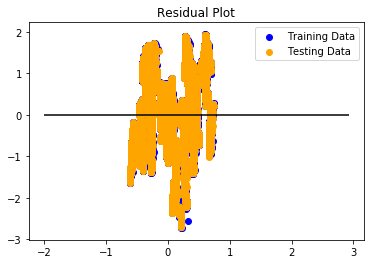

In [81]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [82]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9009298421875628, R2: 0.0960266955481619


In [83]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9015632473437848, R2: 0.09539115066407133


In [84]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9009298421773836, R2: 0.0960266955583754


In [85]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9011682382063777, R2: 0.09578749419550936


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8422550694055857

In [89]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.58815521666964321, 'entryDate'),
 (0.37810135357940305, 'sec'),
 (0.033434757629007085, 'volume'),
 (0.00030867212194745362, 'ageOrder'),
 (0.0, 'contractDelivery')]

In [90]:
#Random forest

from sklearn.ensemble import RandomForestRegressor

estimators = [5,10,25,50]
scores = []
for estimate in estimators:
   rf = RandomForestRegressor(n_estimators=estimate)
   rf = rf.fit(X_train, y_train)
   score = rf.score(X_test, y_test)
   scores.append(score)
   print(f"This is the score for {estimate} trees: {score}")
   depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
   num = len(depths)
   #print(depths)
   print(f"average depth of trees in forrest: {sum(depths)/num}")
   print(f"number of trees used {num}")
   print("==============================================================")

This is the score for 5 trees: 0.8275050436478133
average depth of trees in forrest: 48.8
number of trees used 5
This is the score for 10 trees: 0.8348986713818485
average depth of trees in forrest: 48.3
number of trees used 10
This is the score for 25 trees: 0.8394137657995787
average depth of trees in forrest: 48.56
number of trees used 25
This is the score for 50 trees: 0.8407671008880683
average depth of trees in forrest: 49.26
number of trees used 50


# ADD Production

In [106]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
#X = filtered_data1[['sec','volume','PX_SETTLE','operational Capacity','Schedule Capacity','Available Capacity','Design Capacity','GWHDD1','PWCDD1','GWHDD2','PWCDD2','GWHDD3','PWCDD3','GWHDD4','PWCDD4','GWHDD5','PWCDD5','GWHDD6','PWCDD6']]
X = filtered_data1[['contractDelivery', 'volume', 'entryDate', 'ageOrder', 'sec', 'operational Capacity','Schedule Capacity','Available Capacity','Design Capacity']]

y = filtered_data1["tPrice"].values.reshape(-1, 1)

target = filtered_data1["tPrice"]
data = X
feature_names = data.columns

print(X.shape, y.shape)
### END SOLUTION

(389818, 9) (389818, 1)


In [107]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [108]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [109]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [110]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

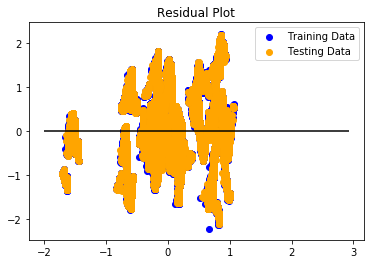

In [111]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [112]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6319867624089623, R2: 0.3658783012476673


In [113]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6765782066722684, R2: 0.32113622108401685


In [114]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6319867476371488, R2: 0.36587831606938187


In [115]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6918656311633554, R2: 0.3057971536154439


In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [117]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99977952077701115

In [118]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.36103001554178732, 'Design Capacity'),
 (0.27203588807407797, 'operational Capacity'),
 (0.14743700616947078, 'Schedule Capacity'),
 (0.13196911856681973, 'sec'),
 (0.067878832046768298, 'entryDate'),
 (0.013443401390782801, 'Available Capacity'),
 (0.0061528747389206929, 'ageOrder'),
 (5.2863471372262659e-05, 'volume'),
 (0.0, 'contractDelivery')]

In [119]:
#Random forest

from sklearn.ensemble import RandomForestRegressor

estimators = [5,10,25,50]
scores = []
for estimate in estimators:
   rf = RandomForestRegressor(n_estimators=estimate)
   rf = rf.fit(X_train, y_train)
   score = rf.score(X_test, y_test)
   scores.append(score)
   print(f"This is the score for {estimate} trees: {score}")
   depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
   num = len(depths)
   #print(depths)
   print(f"average depth of trees in forrest: {sum(depths)/num}")
   print(f"number of trees used {num}")
   print("==============================================================")

This is the score for 5 trees: 0.9997647266648796
average depth of trees in forrest: 31.6
number of trees used 5
This is the score for 10 trees: 0.9997720840196769
average depth of trees in forrest: 31.9
number of trees used 10
This is the score for 25 trees: 0.9997773452900812
average depth of trees in forrest: 32.0
number of trees used 25
This is the score for 50 trees: 0.999778245476397
average depth of trees in forrest: 32.1
number of trees used 50


# ADD Weather Data

In [121]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
#X = filtered_data1[['sec','volume','PX_SETTLE','operational Capacity','Schedule Capacity','Available Capacity','Design Capacity','GWHDD1','PWCDD1','GWHDD2','PWCDD2','GWHDD3','PWCDD3','GWHDD4','PWCDD4','GWHDD5','PWCDD5','GWHDD6','PWCDD6']]
X = filtered_data1[['contractDelivery', 'volume', 'entryDate', 'ageOrder', 'sec', 'operational Capacity','Schedule Capacity','Available Capacity','Design Capacity','GWHDD1','PWCDD1','GWHDD2','PWCDD2','GWHDD3','PWCDD3','GWHDD4','PWCDD4','GWHDD5','PWCDD5','GWHDD6','PWCDD6','GWHDD7','PWCDD7','GWHDD8','PWCDD8','GWHDD9','PWCDD9']]

y = filtered_data1["tPrice"].values.reshape(-1, 1)

target = filtered_data1["tPrice"]
data = X
feature_names = data.columns

print(X.shape, y.shape)
### END SOLUTION

(389818, 27) (389818, 1)


In [122]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [123]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [124]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [125]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

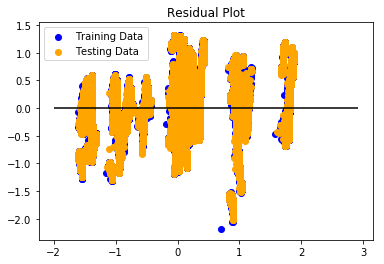

In [126]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [127]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.18464069635373032, R2: 0.8147355625229458


In [128]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.22136228884949316, R2: 0.7778899195453236


In [129]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.18462249009531503, R2: 0.8147538302845523


In [130]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.21299287557267108, R2: 0.7862876058266451


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [132]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99977780147215189

In [133]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.34252777366530329, 'GWHDD5'),
 (0.20350375949758237, 'PWCDD8'),
 (0.11816749356382687, 'sec'),
 (0.11440846994867672, 'GWHDD1'),
 (0.056404997589355889, 'PWCDD7'),
 (0.037656025674350661, 'GWHDD6'),
 (0.029691116538698076, 'entryDate'),
 (0.020478121473572461, 'PWCDD1'),
 (0.013291540051345701, 'PWCDD6'),
 (0.010377962080750886, 'GWHDD4'),
 (0.0096134040824726024, 'GWHDD7'),
 (0.0093948643666037727, 'GWHDD2'),
 (0.0077414742249105693, 'PWCDD5'),
 (0.00523796461174418, 'ageOrder'),
 (0.0035359933253548696, 'Schedule Capacity'),
 (0.0029008408217615321, 'Available Capacity'),
 (0.0022353204421602033, 'PWCDD4'),
 (0.002163042589086007, 'PWCDD3'),
 (0.0019357142151960182, 'PWCDD2'),
 (0.0017174404124693115, 'GWHDD3'),
 (0.0016906459139186775, 'GWHDD8'),
 (0.0016359462210175815, 'operational Capacity'),
 (0.0016054300637713447, 'Design Capacity'),
 (0.0010177601867534865, 'GWHDD9'),
 (0.0010137672411188767, 'PWCDD9'),
 (5.3131198198167212e-05, 'volume'),
 (0.0, 'contractDelivery')]

In [134]:
#Random forest

from sklearn.ensemble import RandomForestRegressor

estimators = [5,10,25,50]
scores = []
for estimate in estimators:
   rf = RandomForestRegressor(n_estimators=estimate)
   rf = rf.fit(X_train, y_train)
   score = rf.score(X_test, y_test)
   scores.append(score)
   print(f"This is the score for {estimate} trees: {score}")
   depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
   num = len(depths)
   #print(depths)
   print(f"average depth of trees in forrest: {sum(depths)/num}")
   print(f"number of trees used {num}")
   print("==============================================================")

This is the score for 5 trees: 0.9997630985665092
average depth of trees in forrest: 33.6
number of trees used 5
This is the score for 10 trees: 0.9997718112251168
average depth of trees in forrest: 33.7
number of trees used 10
This is the score for 25 trees: 0.9997752339941498
average depth of trees in forrest: 33.56
number of trees used 25
This is the score for 50 trees: 0.9997774456930634
average depth of trees in forrest: 33.98
number of trees used 50


# Add Settle Price

In [144]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
#X = filtered_data1[['sec','volume','PX_SETTLE','operational Capacity','Schedule Capacity','Available Capacity','Design Capacity','GWHDD1','PWCDD1','GWHDD2','PWCDD2','GWHDD3','PWCDD3','GWHDD4','PWCDD4','GWHDD5','PWCDD5','GWHDD6','PWCDD6']]
X = filtered_data1[['contractDelivery', 'volume', 'entryDate', 'ageOrder', 'sec', 'PX_SETTLE', 'operational Capacity','Schedule Capacity','Available Capacity','Design Capacity','GWHDD1','PWCDD1','GWHDD2','PWCDD2','GWHDD3','PWCDD3','GWHDD4','PWCDD4','GWHDD5','PWCDD5','GWHDD6','PWCDD6','GWHDD7','PWCDD7','GWHDD8','PWCDD8','GWHDD9','PWCDD9']]

y = filtered_data1["tPrice"].values.reshape(-1, 1)

target = filtered_data1["tPrice"]
data = X
feature_names = data.columns

print(X.shape, y.shape)
### END SOLUTION

(389818, 28) (389818, 1)


In [145]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [146]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [147]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [148]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

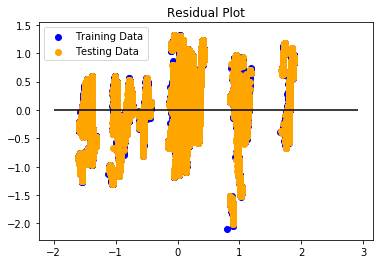

In [149]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [150]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.18465099282785377, R2: 0.8147252312659469


In [151]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.19744750680111506, R2: 0.8018854889461838


In [152]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.18462249221787144, R2: 0.8147538281548257


In [153]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.19326908462328288, R2: 0.8060780263965123


In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [155]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99977784075732012

In [156]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.73351131152105575, 'PX_SETTLE'),
 (0.13517140860162968, 'sec'),
 (0.036077316599259265, 'GWHDD7'),
 (0.016172811541641369, 'entryDate'),
 (0.0078236375317728042, 'PWCDD1'),
 (0.0067471099804360902, 'Schedule Capacity'),
 (0.0060533178097617289, 'PWCDD8'),
 (0.0059679124137526655, 'PWCDD9'),
 (0.005956810127312453, 'ageOrder'),
 (0.00559585917710647, 'PWCDD7'),
 (0.004601558039046336, 'PWCDD2'),
 (0.0045326898541254539, 'GWHDD5'),
 (0.0043816475436579648, 'GWHDD9'),
 (0.0035129806875304737, 'PWCDD3'),
 (0.0035096673769667115, 'operational Capacity'),
 (0.0031962588312553658, 'GWHDD2'),
 (0.0029741606182959734, 'GWHDD1'),
 (0.002690728019921978, 'GWHDD6'),
 (0.0024105732180908584, 'PWCDD6'),
 (0.0020526319699514599, 'PWCDD5'),
 (0.0015850805539989398, 'Available Capacity'),
 (0.0015499573796595751, 'GWHDD4'),
 (0.0012395336333408413, 'GWHDD3'),
 (0.0011027578983661005, 'Design Capacity'),
 (0.00095526084762667174, 'GWHDD8'),
 (0.00057400251168262617, 'PWCDD4'),
 (5.3015712754364772e-

In [157]:
#Random forest

from sklearn.ensemble import RandomForestRegressor

estimators = [5,10,25,50]
scores = []
for estimate in estimators:
   rf = RandomForestRegressor(n_estimators=estimate)
   rf = rf.fit(X_train, y_train)
   score = rf.score(X_test, y_test)
   scores.append(score)
   print(f"This is the score for {estimate} trees: {score}")
   depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
   num = len(depths)
   #print(depths)
   print(f"average depth of trees in forrest: {sum(depths)/num}")
   print(f"number of trees used {num}")
   print("==============================================================")

This is the score for 5 trees: 0.9997572611515283
average depth of trees in forrest: 32.0
number of trees used 5
This is the score for 10 trees: 0.9997706602373297
average depth of trees in forrest: 32.2
number of trees used 10
This is the score for 25 trees: 0.9997750418849501
average depth of trees in forrest: 31.8
number of trees used 25
This is the score for 50 trees: 0.9997759124316792
average depth of trees in forrest: 32.4
number of trees used 50


# 1806 Contracts, all available trade dates and skTime over sec, no settle prices

In [ ]:
filtered_data1 = data_for_analysis[data_for_analysis.contractDelivery == 1806.0]
filtered_data1.sort_values(by=['skTime'])
filtered_data1

In [144]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
#X = filtered_data1[['sec','volume','PX_SETTLE','operational Capacity','Schedule Capacity','Available Capacity','Design Capacity','GWHDD1','PWCDD1','GWHDD2','PWCDD2','GWHDD3','PWCDD3','GWHDD4','PWCDD4','GWHDD5','PWCDD5','GWHDD6','PWCDD6']]
X = filtered_data1[['contractDelivery', 'volume', 'entryDate', 'ageOrder', 'skTime', 'operational Capacity','Schedule Capacity','Available Capacity','Design Capacity','GWHDD1','PWCDD1','GWHDD2','PWCDD2','GWHDD3','PWCDD3','GWHDD4','PWCDD4','GWHDD5','PWCDD5','GWHDD6','PWCDD6','GWHDD7','PWCDD7','GWHDD8','PWCDD8','GWHDD9','PWCDD9']]

y = filtered_data1["tPrice"].values.reshape(-1, 1)

target = filtered_data1["tPrice"]
data = X
feature_names = data.columns

print(X.shape, y.shape)
### END SOLUTION

(389818, 28) (389818, 1)


In [145]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [146]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [147]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [148]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

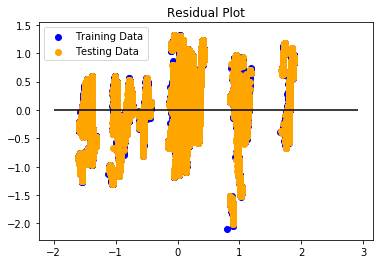

In [149]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [150]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.18465099282785377, R2: 0.8147252312659469


In [151]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.19744750680111506, R2: 0.8018854889461838


In [152]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.18462249221787144, R2: 0.8147538281548257


In [153]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.19326908462328288, R2: 0.8060780263965123


In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [155]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99977784075732012

In [156]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.73351131152105575, 'PX_SETTLE'),
 (0.13517140860162968, 'sec'),
 (0.036077316599259265, 'GWHDD7'),
 (0.016172811541641369, 'entryDate'),
 (0.0078236375317728042, 'PWCDD1'),
 (0.0067471099804360902, 'Schedule Capacity'),
 (0.0060533178097617289, 'PWCDD8'),
 (0.0059679124137526655, 'PWCDD9'),
 (0.005956810127312453, 'ageOrder'),
 (0.00559585917710647, 'PWCDD7'),
 (0.004601558039046336, 'PWCDD2'),
 (0.0045326898541254539, 'GWHDD5'),
 (0.0043816475436579648, 'GWHDD9'),
 (0.0035129806875304737, 'PWCDD3'),
 (0.0035096673769667115, 'operational Capacity'),
 (0.0031962588312553658, 'GWHDD2'),
 (0.0029741606182959734, 'GWHDD1'),
 (0.002690728019921978, 'GWHDD6'),
 (0.0024105732180908584, 'PWCDD6'),
 (0.0020526319699514599, 'PWCDD5'),
 (0.0015850805539989398, 'Available Capacity'),
 (0.0015499573796595751, 'GWHDD4'),
 (0.0012395336333408413, 'GWHDD3'),
 (0.0011027578983661005, 'Design Capacity'),
 (0.00095526084762667174, 'GWHDD8'),
 (0.00057400251168262617, 'PWCDD4'),
 (5.3015712754364772e-

In [157]:
#Random forest

from sklearn.ensemble import RandomForestRegressor

estimators = [5,10,25,50]
scores = []
for estimate in estimators:
   rf = RandomForestRegressor(n_estimators=estimate)
   rf = rf.fit(X_train, y_train)
   score = rf.score(X_test, y_test)
   scores.append(score)
   print(f"This is the score for {estimate} trees: {score}")
   depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
   num = len(depths)
   #print(depths)
   print(f"average depth of trees in forrest: {sum(depths)/num}")
   print(f"number of trees used {num}")
   print("==============================================================")

This is the score for 5 trees: 0.9997572611515283
average depth of trees in forrest: 32.0
number of trees used 5
This is the score for 10 trees: 0.9997706602373297
average depth of trees in forrest: 32.2
number of trees used 10
This is the score for 25 trees: 0.9997750418849501
average depth of trees in forrest: 31.8
number of trees used 25
This is the score for 50 trees: 0.9997759124316792
average depth of trees in forrest: 32.4
number of trees used 50


import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [88]:
#result4.set_index('kTime')

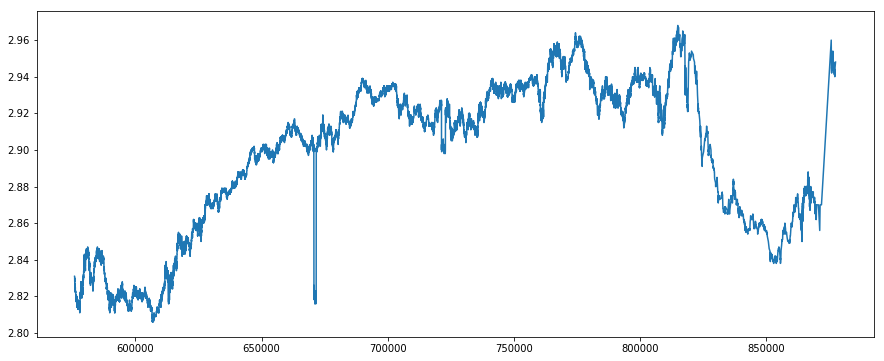

In [115]:
plt.plot(result4.tPrice)

In [119]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


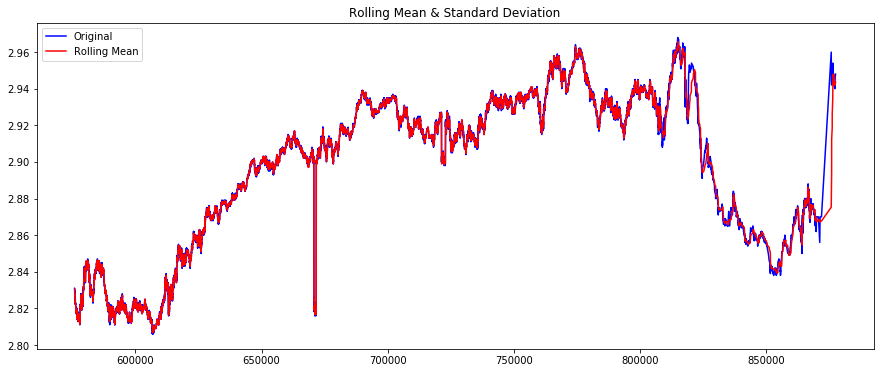

Results of Dickey-Fuller Test:
Test Statistic                    -2.026211
p-value                            0.275200
#Lags Used                        58.000000
Number of Observations Used    78738.000000
Critical Value (1%)               -3.430433
Critical Value (5%)               -2.861577
Critical Value (10%)              -2.566790
dtype: float64


In [120]:
test_stationarity(result4.tPrice)
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/